In [ ]:
from utils import *
import logging
import numpy

from scripts import *

logger = logging.getLogger('main')

In [ ]:

def get_hsv_mask(img, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug('getting hsv mask')

    lower_thresh = numpy.array([0, 50, 0], dtype=numpy.uint8)
    upper_thresh = numpy.array([120, 150, 255], dtype=numpy.uint8)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    msk_hsv = cv2.inRange(img_hsv, lower_thresh, upper_thresh)

    msk_hsv[msk_hsv < 128] = 0
    msk_hsv[msk_hsv >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_hsv', msk_hsv)

    return msk_hsv.astype(float)

In [ ]:
def get_rgb_mask(img, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug('getting rgb mask')

    lower_thresh = numpy.array([45, 52, 108], dtype=numpy.uint8)
    upper_thresh = numpy.array([255, 255, 255], dtype=numpy.uint8)

    mask_a = cv2.inRange(img, lower_thresh, upper_thresh)
    mask_b = 255 * ((img[:, :, 2] - img[:, :, 1]) / 20)
    mask_c = 255 * ((numpy.max(img, axis=2) - numpy.min(img, axis=2)) / 20)
    # msk_rgb = cv2.bitwise_and(mask_c, cv2.bitwise_and(mask_a, mask_b))
    mask_d = numpy.bitwise_and(numpy.uint64(mask_a), numpy.uint64(mask_b))
    msk_rgb = numpy.bitwise_and(numpy.uint64(mask_c), numpy.uint64(mask_d))

    msk_rgb[msk_rgb < 128] = 0
    msk_rgb[msk_rgb >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_rgb', msk_rgb)

    return msk_rgb.astype(float)


In [ ]:
def get_ycrcb_mask(img, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug('getting ycrcb mask')

    lower_thresh = numpy.array([90, 100, 130], dtype=numpy.uint8)
    upper_thresh = numpy.array([230, 120, 180], dtype=numpy.uint8)

    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    msk_ycrcb = cv2.inRange(img_ycrcb, lower_thresh, upper_thresh)

    msk_ycrcb[msk_ycrcb < 128] = 0
    msk_ycrcb[msk_ycrcb >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_ycrcb', msk_ycrcb)

    return msk_ycrcb.astype(float)


In [ ]:
def pre(path):
    img1 = cv2.imread(path)
    img_hsv=cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

    H=img_hsv[:,:,0]
    S=img_hsv[:,:,1]
    V=img_hsv[:,:,2]


    #Equalize S
    img_HSV_eq=np.copy(img_hsv)
    img_HSV_eq[:,:,1]=cv2.equalizeHist(img_HSV_eq[:,:,1])

    img_rgb=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    show_images([img_rgb,H,S,V,cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB)],['Original','h','S','V','Equalize S'])



###########################################Hand Masks##############################################################

    msk_hsv=get_hsv_mask(img_rgb, debug=False)
    msk_rgb=get_rgb_mask(img_rgb,debug=False)
    msk_ycrcb=get_ycrcb_mask(img_rgb, debug=False)


    n_masks = 3.0
    mask = (msk_hsv + msk_rgb + msk_ycrcb) / n_masks
    print(np.max(msk_hsv))
    print(np.max(msk_rgb))
    print(np.max(msk_ycrcb))
    print(mask)
    # mask = cv2.bitwise_or(msk_hsv, cv2.bitwise_or(msk_rgb, msk_ycrcb))



    # # thresh=0.5
    # # mask[mask < thresh] = 0.0
    # # mask[mask >= thresh] = 255.0k=
    # logger.debug('{0}% of the image is skin'.format(int((100.0 / 255.0) * numpy.sum(mask) / mask.size)))

    # mask_before_closing = mask.astype(numpy.uint8)
    # mask=mask_before_closing


    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask_before_closing=mask

    show_images([img_rgb,msk_hsv,msk_rgb,msk_ycrcb,mask_before_closing,mask])

    # # Segmentation
    # # Defining HSV Threadholds
    # lower_threshold = np.array([0, 100, 80], dtype=np.uint8)
    # upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # # Single Channel mask,denoting presence of colours in the about threshold
    # skinMask_b = cv2.inRange(img_HSV_eq, lower_threshold, upper_threshold)

    # # Cleaning up mask using Gaussian Filter
    # skinMask = cv2.GaussianBlur(skinMask_b, (3, 3), 0)

    # # # Apply Closing =(Erode+Dilate) to remove 
    # kernel = np.ones((10, 10), np.uint8)
    # skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_ERODE, kernel, iterations=2) #erode
    # skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_DILATE, kernel, iterations=2) #Dilate Back  



    # # cv2.imwrite('hand.jpg',cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2BGR))


    # show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),skinMask],['Original','skinMask'])

    # #Draw Contours
    # skinMask=mask

    # debug=True
    # name=path

    # # Find Contours
    # contours, hierarchy = cv2.findContours(
    #     skinMask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # # Draw for debug
    # if (debug):
    #     img_contours = np.copy(img1)
    #     cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

    # # Get Largest Contour
    # sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    # largest_contour = sorted_contours[0]
    # if (debug):
    #     largest_contour_img = np.copy(img1)
    #     cv2.drawContours(largest_contour_img,
    #                      largest_contour, -1, (255, 0, 0), 10)

    # # Binary_img_contours[Result]
    # hand_contour = np.zeros((np.shape(img1)[0], np.shape(img1)[1], 1))
    # cv2.drawContours(hand_contour, largest_contour, -1, 255, 10)

    # if (debug):
    #     show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),
    #                  img_contours, largest_contour_img, hand_contour],
    #                 ['RGB'+name, 'Contours', 'Largest Contour', 'hand_contour'])

    
    return None

In [ ]:
pre('../data/men/1/1_men (67).JPG')

In [ ]:
pre('../data/men/1/1_men (31).JPG')
pre('../data/men/1/1_men (139).JPG')


In [ ]:
pre('../data/men/5/5_men (48).JPG')


In [ ]:
pre('../data/men/2/2_men (35).JPG')



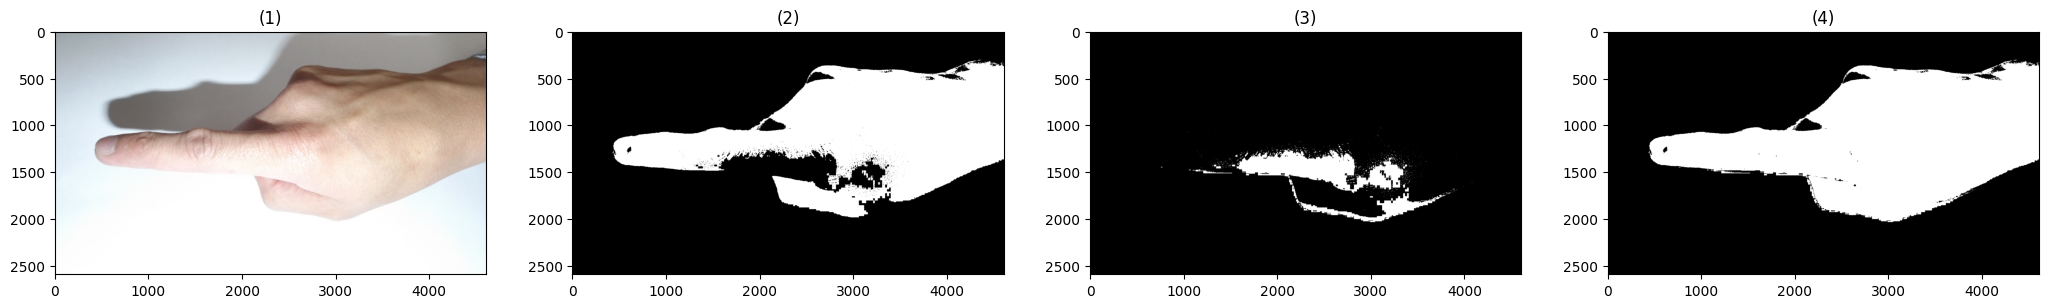

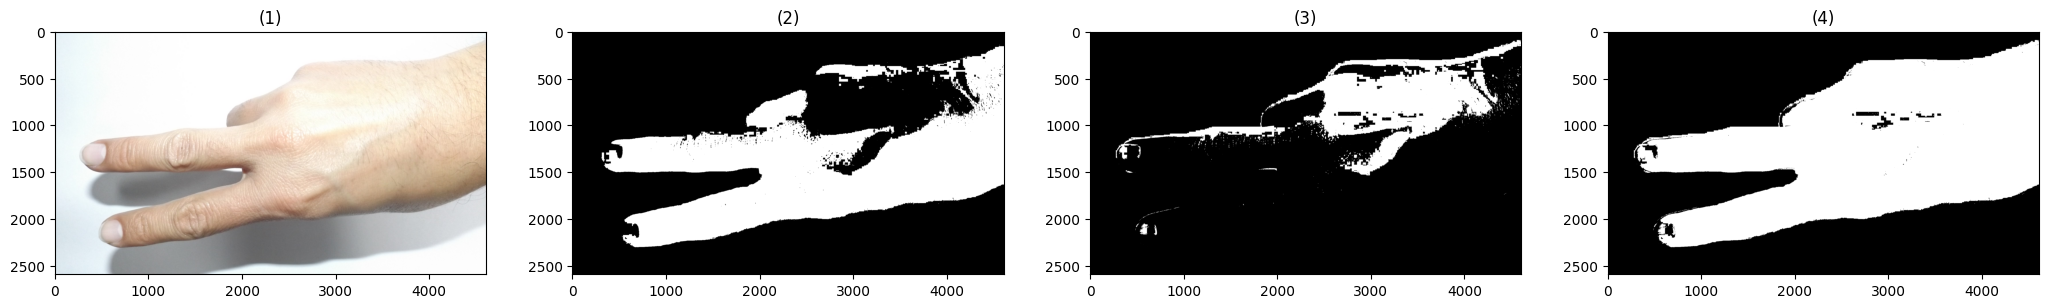

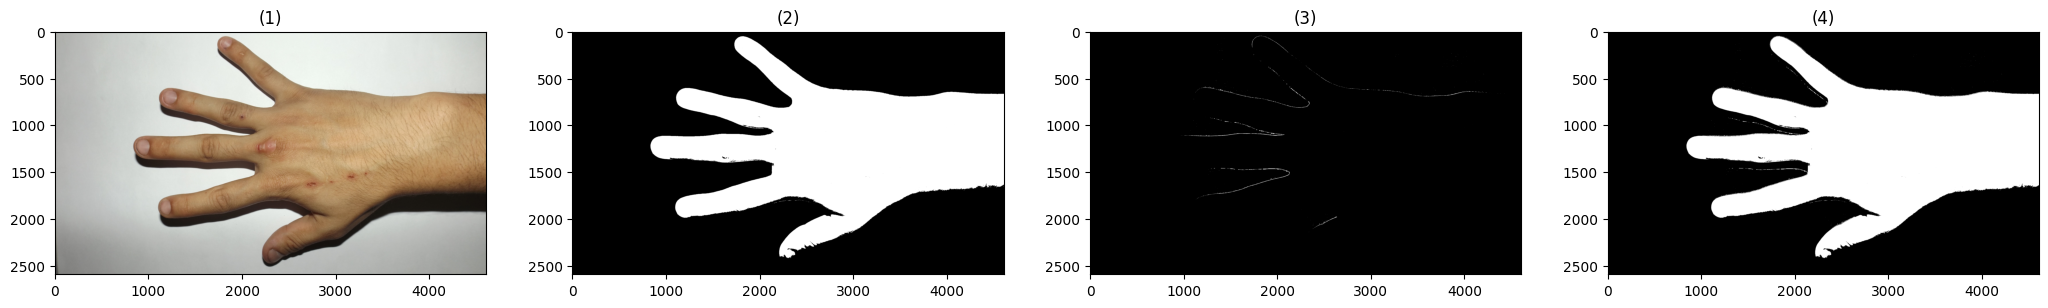

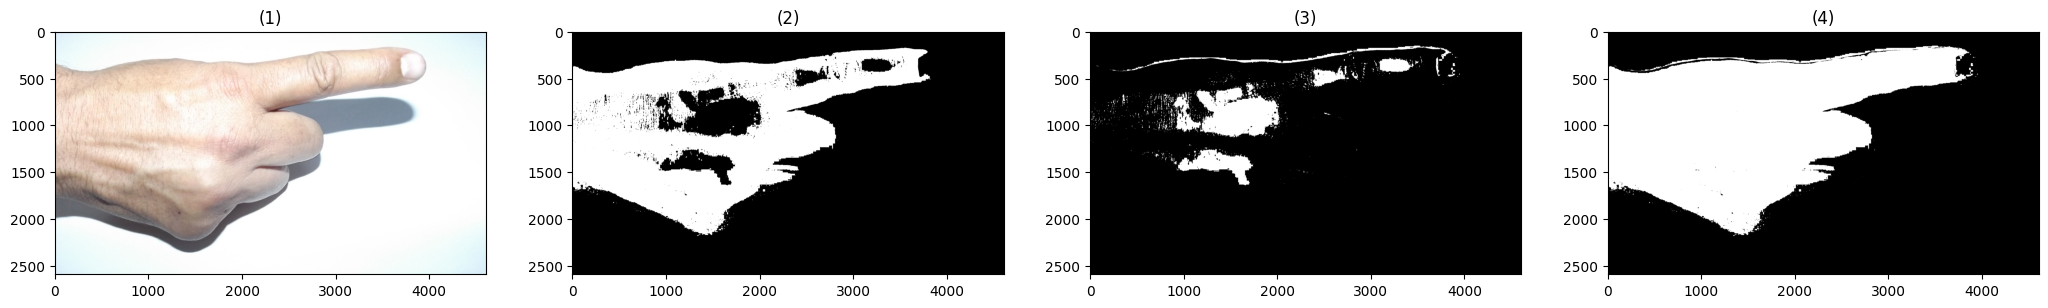

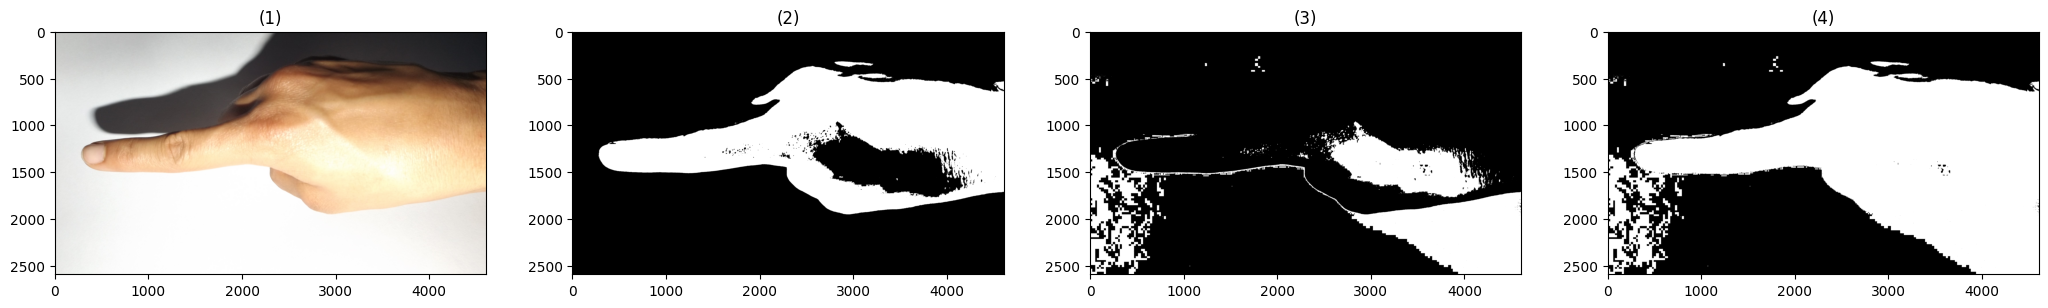

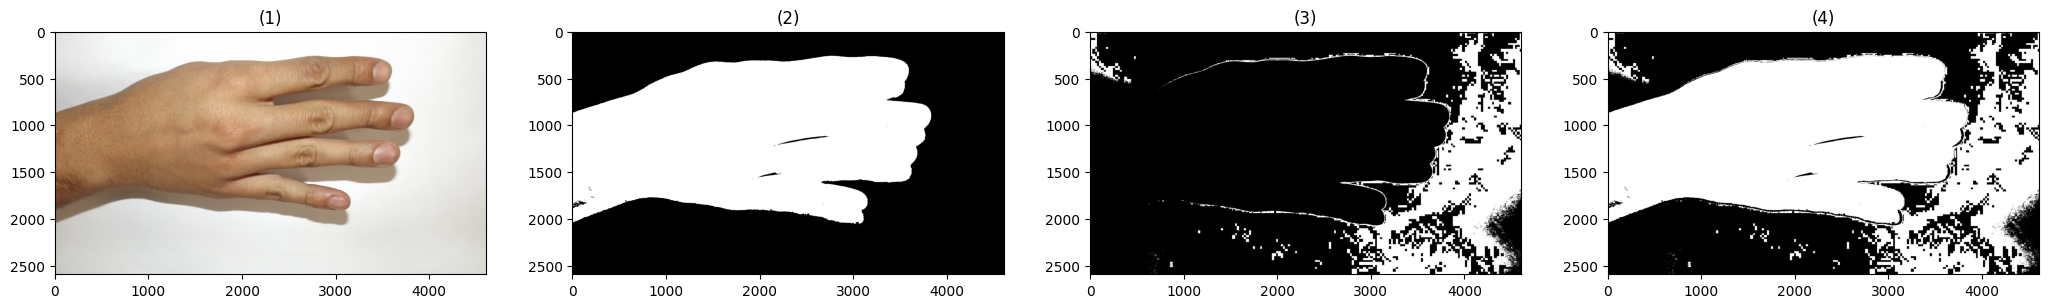

In [102]:
def RGB(img):

    # img = cv2.imread('./Test Algorithms images/skin.png')

    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]


    BGR_Max=np.maximum.reduce([R,G,B])
    BGR_Min=np.minimum.reduce([R,G,B])

    Rule_1=np.logical_and.reduce([R>95,G>40,B>20,(BGR_Max-BGR_Min)>15,abs(R-G)>15,R>G,R>B])
    Rule_2=np.logical_and.reduce([R>220,G>210,B>170,abs(R-G)<=15,R>B,G>B])

    RGB_Rule=np.logical_or(Rule_1,Rule_2)

    show_images([img,Rule_1,Rule_2,RGB_Rule])


img = cv2.imread('../data/men/1/1_men (67).JPG')
RGB(img)
img = cv2.imread('../data/men/2/2_men (35).JPG')
RGB(img)
img = cv2.imread('../data/men/5/5_men (48).JPG')
RGB(img)
img = cv2.imread('../data/men/1/1_men (139).JPG')
RGB(img)
img = cv2.imread('../data/men/1/1_men (31).JPG')
RGB(img)
img = cv2.imread('../data/men/4/4_men (17).JPG')
RGB(img)

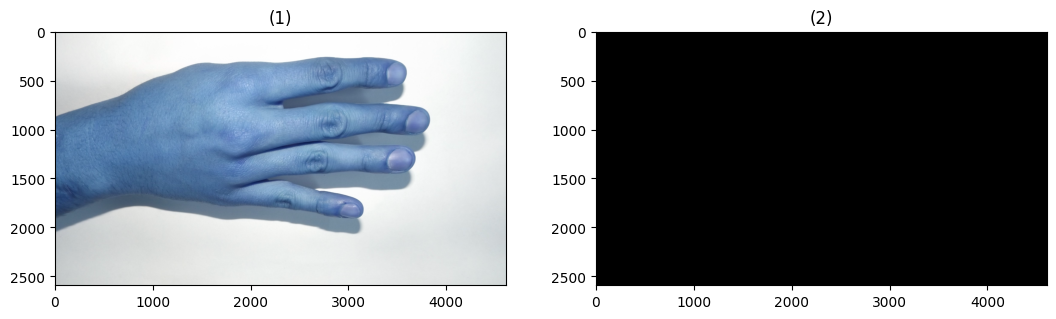

In [99]:
def lines(axis):
    line1=1.5862*axis+20
    line2=0.3448*axis+76.2069
    line3=-1.005*axis+234.5652
    line4=-1.15*axis+301.75
    line5=-2.2857*axis+432.85

    return line1,line2,line3,line4,line5


# img = cv2.imread('../data/men/1/1_men (67).JPG')
# img = cv2.imread('../data/men/2/2_men (35).JPG')
# img = cv2.imread('../data/men/5/5_men (48).JPG')
# img = cv2.imread('../data/men/1/1_men (139).JPG')
# img = cv2.imread('../data/men/1/1_men (31).JPG')
img = cv2.imread('../data/men/4/4_men (17).JPG')



YCrCb_Frame=cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y,Cr,Cb=[YCrCb_Frame[...,YCrCb] for YCrCb in range(3)]
line1,line2,line3,line4,line5=lines(Cb)
YCrCb_Rule=np.logical_and.reduce([line1-Cr>=0,
                                  line2-Cr<=0,
                                  line3-Cr<=0,
                                  line4-Cr>=0,
                                  line5-Cr>=0,
                                  ])


show_images([img,YCrCb_Rule])


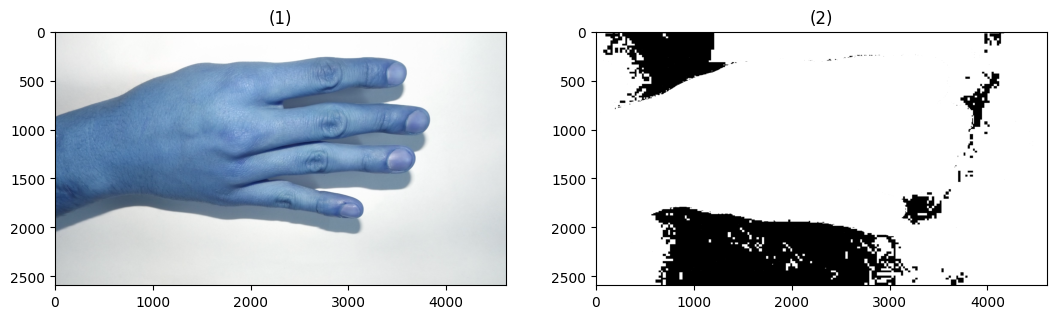

In [96]:

# img = cv2.imread('../data/men/1/1_men (67).JPG')
# img = cv2.imread('../data/men/2/2_men (35).JPG')
# img = cv2.imread('../data/men/5/5_men (48).JPG')
# img = cv2.imread('../data/men/1/1_men (139).JPG')
# img = cv2.imread('../data/men/1/1_men (31).JPG')
img = cv2.imread('../data/men/4/4_men (17).JPG')


HSV=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H=HSV[:,:,0]


HSV_Rule=np.logical_or.reduce([H<50,H>150])


show_images([img,HSV_Rule])


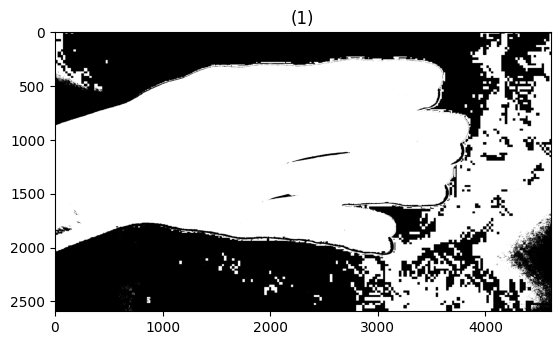

In [97]:
Combine_Rule=np.logical_and(RGB_Rule,HSV_Rule)
show_images([Combine_Rule])